## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview
merge_table = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
#mouse id, timepoint and drug regimen
#.loc
#not unique and then did .loc

merge_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [58]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = merge_table.loc[merge_table.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [61]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = merge_table.loc[merge_table["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [62]:
merge_table = merge_table[merge_table['Mouse ID'].isin(duplicate_mouse_ids)==False]
merge_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [63]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

variance_regimen = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
mean_regimen = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_regimen = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
stdv_regimen = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_regimen = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
regimens_df = pd.DataFrame({"Mean": mean_regimen, "Median": median_regimen, "Variance": variance_regimen, "Standard Deviation": stdv_regimen, 
                          "SEM": sem_regimen})
regimens_df



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [64]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
grouped_data_df = pd.DataFrame(merge_table.groupby(["Drug Regimen"]).count()).reset_index()
# Filter the DataFrame down only to those columns to chart
regimen_chart = grouped_data_df[["Drug Regimen","Mouse ID"]]
regimen_chart = regimen_chart.rename(columns={"Mouse ID": "Count"})
# Set the index to be "Drug Regimen" so they will be used as labels
regimen_chart = regimen_chart.set_index("Drug Regimen")


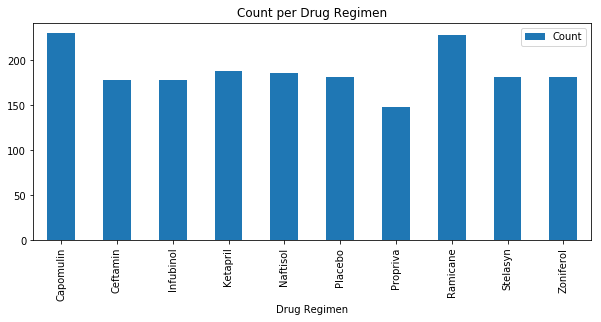

In [65]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# Use DataFrame.plot() in order to create a bar chart of the data
regimen_chart.plot(kind="bar", figsize=(10,4))

# Set a title for the chart
plt.title("Count per Drug Regimen")

plt.show()




In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# select column to convert to list here
drug_regimens = regimens_df.index.tolist()
drug_regimens

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [67]:
total_regimens = (merge_table.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
total_regimens

[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

In [68]:
x_axis = np.arange(len(total_regimens))

<BarContainer object of 10 artists>

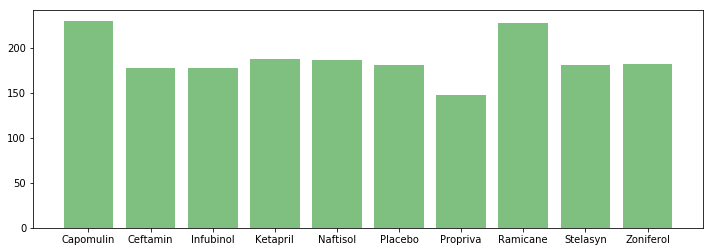

In [69]:
# Define x-axis
x_axis = drug_regimens
# Create a bar chart based upon the above data
plt.figure(figsize=(12,4))
plt.bar(x_axis, total_regimens, color='g', alpha=0.5, align="center")

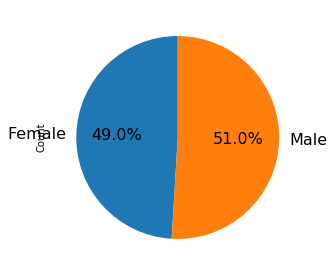

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(merge_table.groupby(["Sex"]).count()).reset_index()
gender_df.head()

gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df.head()




plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', y = "Count", ax=ax1, autopct='%1.1f%%', startangle=90, shadow=False, labels=gender_df['Sex'], legend = False, fontsize=16)



(-1.1171944866462706,
 1.1057967798535038,
 -1.110919364943666,
 1.107907705791865)

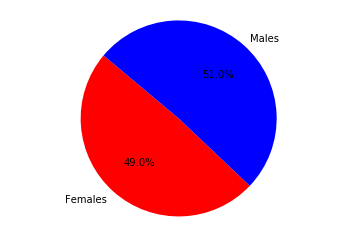

In [71]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt


gender_count = (merge_table.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count

# Labels for the sections of our pie chart
labels = ["Females", "Males"]

# The colors of each section of the pie chart
colors = ["red", "blue"]

plt.pie(gender_count, labels=labels, colors=colors, autopct="%1.1f%%", startangle=140)
#ensure the axis are equal
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [107]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
merge_table.head()
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Sort data by Drug Regime, Mouse ID and Timepoint
# sorted_df = merge_table.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
# # Select final volume of each mouse 
# max_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
max_df = merge_table.groupby(["Mouse ID"])['Timepoint'].max()
max_df.head().reset_index()
max_df = pd.merge(max_df, merge_table,on=['Mouse ID','Timepoint'],how="left")
max_df.head()



# # # Select data for Capomulin regimen and reset index
capomulin_data_df = max_df[max_df['Drug Regimen'].isin(['Capomulin'])]
capomulin_data_df.head().reset_index()
cap_list = capomulin_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cap_list = cap_list["Tumor Volume (mm3)"]
cap_list


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


0     23.343598
1     28.430964
2     28.484033
3     30.485985
4     31.023923
5     31.896238
6     32.377357
7     33.329098
8     34.455298
9     36.041047
10    37.074024
11    37.311846
12    38.125164
13    38.753265
14    38.846876
15    38.939633
16    38.982878
17    39.952347
18    40.159220
19    40.658124
20    40.728578
21    41.483008
22    41.581521
23    46.539206
24    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [108]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

cap_list = capomulin_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cap_list = cap_list["Tumor Volume (mm3)"]
cap_list

#determining the quartiles of capomulin
quartiles = cap_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

#outlier = cap_list.loc[(cap_list > upper_bound) | (cap_list < lower_bound)]

#outlier = [iqr, lower_bound, upper_bound, lowerq, upperq]
#outliers = pd.Series(outlier)
#cap_list = cap_list.append(outliers, ignore_index=True)
#cap_list = cap_list.sort_values(ascending=True)


#print(outlier)

#outliers2 = np.array(outliers)
#outliers3 = pd.DataFrame()
#cap_end = pd.merge(outliers, ignore_index=False, verify_integrity=False)
#cap_end = pd.merge(cap_list, outliers)
#print(outliers2)
#print(f"Values below {lower_bound} could be outliers.")
#print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 38.125164399999996 


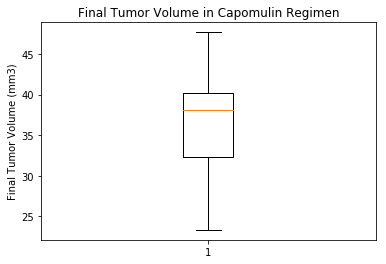

In [109]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Capomulin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cap_list)
plt.show()

In [110]:
ramicane_data_df = max_df[max_df['Drug Regimen'].isin(['Ramicane'])]
ramicane_data_df.head().reset_index()

,index,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,6,a411,45,Ramicane,Male,3,22,38.407618,1
1,7,a444,45,Ramicane,Female,10,25,43.047543,0
2,10,a520,45,Ramicane,Male,13,21,38.810366,1
3,12,a644,45,Ramicane,Female,7,17,32.978522,1
4,33,c458,30,Ramicane,Female,23,20,38.342008,2


In [111]:
ram_list = ramicane_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ram_list = ram_list["Tumor Volume (mm3)"]
ram_list

0     22.050126
1     29.128472
2     30.276232
3     30.564625
4     30.638696
5     31.095335
6     31.560470
7     32.978522
8     33.397653
9     33.562402
10    36.134852
11    36.374510
12    36.561652
13    37.225650
14    37.311236
15    38.342008
16    38.407618
17    38.810366
18    40.659006
19    40.667713
20    43.047543
21    43.166373
22    43.419381
23    44.183451
24    45.220869
Name: Tumor Volume (mm3), dtype: float64

In [112]:
quartiles = ram_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

#outlier = [iqr, lower_bound, upper_bound, lowerq, upperq]
#outliers = pd.Series(outlier)
#ram_list = ram_list.append(outliers, ignore_index=True)

print(ram_list)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 31.56046955
The upper quartile of temperatures is: 40.65900627
The interquartile range of temperatures is: 9.098536719999998
The the median of temperatures is: 36.56165229 
0     22.050126
1     29.128472
2     30.276232
3     30.564625
4     30.638696
5     31.095335
6     31.560470
7     32.978522
8     33.397653
9     33.562402
10    36.134852
11    36.374510
12    36.561652
13    37.225650
14    37.311236
15    38.342008
16    38.407618
17    38.810366
18    40.659006
19    40.667713
20    43.047543
21    43.166373
22    43.419381
23    44.183451
24    45.220869
Name: Tumor Volume (mm3), dtype: float64
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


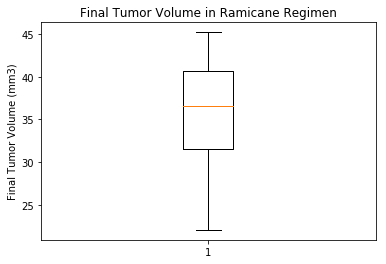

In [113]:
#import seaborn as sns


fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Ramicane Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
#flier.set(marker='o', color='red', alpha=0.5)
#fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
#ax = fig.add_subplot(111)

# Create the boxplot
#bp = ax.boxplot(ram_list, showfliers=True)

#for flier in bp['fliers']:
#    flier.set(marker='o', color='#e7298a', alpha=0.5)

#plt.show()
#sns.boxplot(ram_list, ax=ax1)

ax1.boxplot(ram_list)
plt.show()

In [114]:
infubinol_data_df = max_df[max_df['Drug Regimen'].isin(['Infubinol'])]
infubinol_data_df.reset_index()

,index,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,0,a203,45,Infubinol,Female,20,23,67.973419,2
1,1,a251,45,Infubinol,Female,21,25,65.525743,1
2,11,a577,30,Infubinol,Female,6,25,57.031862,2
3,13,a685,45,Infubinol,Male,8,30,66.083066,3
4,27,c139,45,Infubinol,Male,11,28,72.226731,2
5,31,c326,5,Infubinol,Female,18,25,36.321346,0
6,41,c895,30,Infubinol,Female,7,29,60.969711,2
7,50,e476,45,Infubinol,Male,23,26,62.435404,1
8,56,f345,45,Infubinol,Male,23,26,60.918767,1
9,78,i386,40,Infubinol,Female,23,29,67.289621,4


In [115]:
inf_list = infubinol_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
inf_list = inf_list["Tumor Volume (mm3)"]
inf_list

0     36.321346
1     45.699331
2     46.250112
3     47.010364
4     50.005138
5     51.542431
6     54.048608
7     54.656549
8     55.629428
9     55.650681
10    57.031862
11    58.268442
12    60.165180
13    60.918767
14    60.969711
15    62.117279
16    62.435404
17    62.754451
18    65.525743
19    66.083066
20    66.196912
21    67.289621
22    67.685569
23    67.973419
24    72.226731
Name: Tumor Volume (mm3), dtype: float64

In [116]:
quartiles = inf_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

#calculating the potential outliers
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

#outlier = [iqr, lower_bound, upper_bound, lowerq, upperq]
#outliers = pd.Series(outlier)
#inf_list = inf_list.append(outliers, ignore_index=True)

print(inf_list)


print(f"Values below {lower_bound} are potential outliers.")
print(f"Values above {upper_bound} are potential outliers.")
outliers = inf_list.loc[(inf_list < lower_bound) | (inf_list > upper_bound)]
print(f"Infubinol's potential outliers: {outliers}")

The lower quartile of temperatures is: 54.04860769
The upper quartile of temperatures is: 65.52574285
The interquartile range of temperatures is: 11.477135160000003
The the median of temperatures is: 60.16518046 
0     36.321346
1     45.699331
2     46.250112
3     47.010364
4     50.005138
5     51.542431
6     54.048608
7     54.656549
8     55.629428
9     55.650681
10    57.031862
11    58.268442
12    60.165180
13    60.918767
14    60.969711
15    62.117279
16    62.435404
17    62.754451
18    65.525743
19    66.083066
20    66.196912
21    67.289621
22    67.685569
23    67.973419
24    72.226731
Name: Tumor Volume (mm3), dtype: float64
Values below 36.83290494999999 are potential outliers.
Values above 82.74144559000001 are potential outliers.
Infubinol's potential outliers: 0    36.321346
Name: Tumor Volume (mm3), dtype: float64


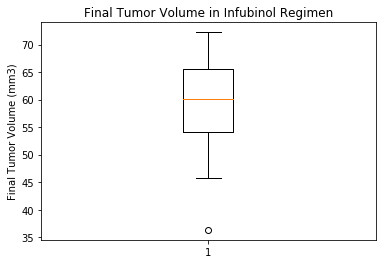

In [117]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Infubinol Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(inf_list)
plt.show()

In [118]:
ceftamin_data_df = max_df[max_df['Drug Regimen'].isin(['Ceftamin'])]
ceftamin_data_df.head().reset_index()

,index,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,3,a275,45,Ceftamin,Female,20,28,62.999356,3
1,21,b447,0,Ceftamin,Male,2,30,45.000000,0
2,22,b487,25,Ceftamin,Female,6,28,56.057749,1
3,25,b759,30,Ceftamin,Female,12,25,55.742829,1
4,58,f436,15,Ceftamin,Female,3,25,48.722078,2


In [119]:
cef_list = ceftamin_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cef_list = cef_list["Tumor Volume (mm3)"]
cef_list

0     45.000000
1     45.000000
2     45.000000
3     45.000000
4     46.784535
5     47.784682
6     48.722078
7     52.925348
8     55.742829
9     56.057749
10    57.918381
11    59.741901
12    59.851956
13    61.386660
14    61.433892
15    61.849023
16    62.999356
17    64.192341
18    64.299830
19    64.634949
20    64.729837
21    67.527482
22    67.748662
23    68.594745
24    68.923185
Name: Tumor Volume (mm3), dtype: float64

In [120]:
quartiles = cef_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

#outlier = [iqr, lower_bound, upper_bound, lowerq, upperq]
#outliers = pd.Series(outlier)
#cef_list = cef_list.append(outliers, ignore_index=True)
#cap_list1 = cap_list.sort_values(ascending=True)
print(cef_list)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of temperatures is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
0     45.000000
1     45.000000
2     45.000000
3     45.000000
4     46.784535
5     47.784682
6     48.722078
7     52.925348
8     55.742829
9     56.057749
10    57.918381
11    59.741901
12    59.851956
13    61.386660
14    61.433892
15    61.849023
16    62.999356
17    64.192341
18    64.299830
19    64.634949
20    64.729837
21    67.527482
22    67.748662
23    68.594745
24    68.923185
Name: Tumor Volume (mm3), dtype: float64
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


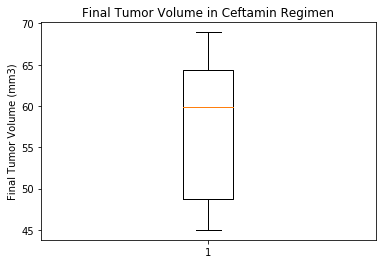

In [121]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Ceftamin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cef_list)
plt.show()

In [122]:
import numpy as np 
import matplotlib as mpl 

import matplotlib.pyplot as plt

data_plots = [cef_list,cap_list,ram_list,inf_list]
#data_plots = np.array(data)
print(data_plots)
    
    
    
    
    

[0     45.000000
1     45.000000
2     45.000000
3     45.000000
4     46.784535
5     47.784682
6     48.722078
7     52.925348
8     55.742829
9     56.057749
10    57.918381
11    59.741901
12    59.851956
13    61.386660
14    61.433892
15    61.849023
16    62.999356
17    64.192341
18    64.299830
19    64.634949
20    64.729837
21    67.527482
22    67.748662
23    68.594745
24    68.923185
Name: Tumor Volume (mm3), dtype: float64, 0     23.343598
1     28.430964
2     28.484033
3     30.485985
4     31.023923
5     31.896238
6     32.377357
7     33.329098
8     34.455298
9     36.041047
10    37.074024
11    37.311846
12    38.125164
13    38.753265
14    38.846876
15    38.939633
16    38.982878
17    39.952347
18    40.159220
19    40.658124
20    40.728578
21    41.483008
22    41.581521
23    46.539206
24    47.685963
Name: Tumor Volume (mm3), dtype: float64, 0     22.050126
1     29.128472
2     30.276232
3     30.564625
4     30.638696
5     31.095335
6     31.560470
7  

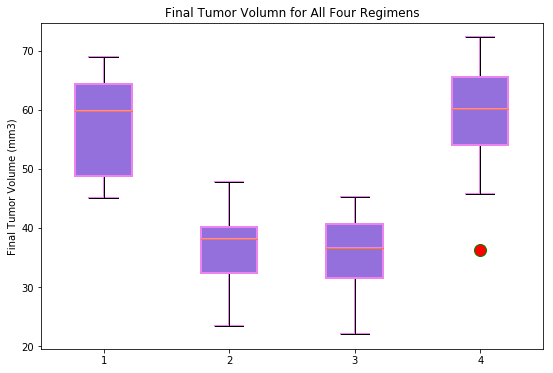

In [123]:
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
plot = ax.boxplot(data_plots)
ax.set_xticklabels(['Ceftamin', 'Capomulin', 'Ramicane', 'Infubinol'])
ax.set_title('Final Tumor Volumn for All Four Regimens')
ax.set_ylabel('Final Tumor Volume (mm3)')

ax.get_yaxis().tick_left()

plot = ax.boxplot(data_plots, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in plot['boxes']:
    # change outline color
    box.set( color='violet', linewidth=2)
    # change fill color
    box.set( facecolor = 'mediumpurple' )

## change color and linewidth of the whiskers
for whisker in plot['whiskers']:
    whisker.set(color='violet', linewidth=2)

## change color and linewidth of the caps
for cap in plot['caps']:
    cap.set(color='violet', linewidth=2)



## change the style of fliers and their fill
#for flier in plot['fliers']:
#    flier.set(marker='o', color='blue', alpha=0.5)

flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='g')
plt.boxplot(data_plots, flierprops=flierprops)


## change color and linewidth of the medians
for median in plot['medians']:
    median.set(color='violet', linewidth=2)
    
# Observation: out of all four regimens Infubinol has the highest median tumor volumn

## Line and Scatter Plots

In [48]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = merge_table.loc[merge_table["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()

single_cap_ID = capomulin_df.loc[capomulin_df["Mouse ID"] == "f966"]
single_cap_ID


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
30,60,f966,Capomulin,Male,16,17,0,45.000000,0
31,61,f966,Capomulin,Male,16,17,5,38.796474,0
32,62,f966,Capomulin,Male,16,17,10,35.624403,0
33,63,f966,Capomulin,Male,16,17,15,32.623003,0
34,64,f966,Capomulin,Male,16,17,20,30.485985,0


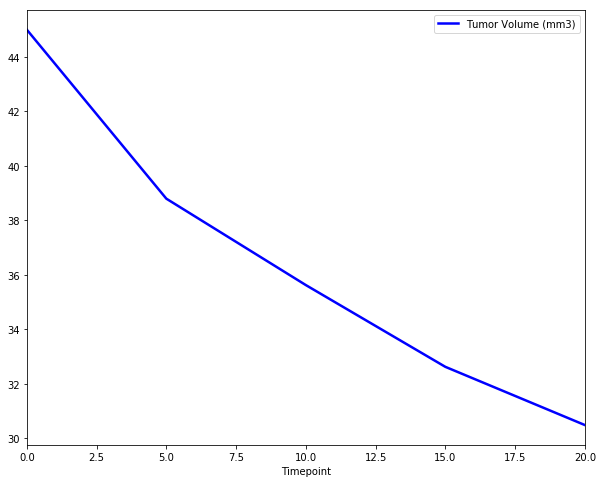

In [49]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Selecting only 2 columns
single_cap_ID = single_cap_ID.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
#capomulin_df.index
#Reset the index
single_cap_ID = single_cap_ID.reset_index(drop=True)
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
single_cap_ID.set_index('Timepoint').plot(figsize=(10, 8), linewidth=2.5, color='blue')

In [50]:
capomulin_df.head()
reduced_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
reduced_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,s185,17,45.000000
1,s185,17,43.878496
2,s185,17,37.614948
3,s185,17,38.177232
4,s185,17,36.866876


In [51]:
average_cap = pd.DataFrame(reduced_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
average_cap.head()
average_cap = average_cap.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
average_cap.head()

,Mouse ID,Weight (g),Average Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


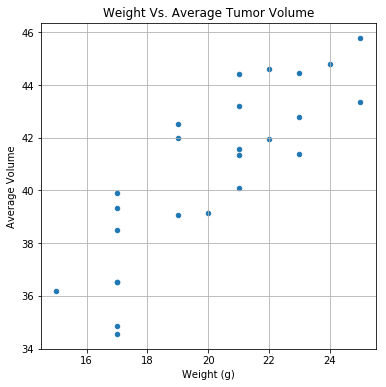

In [52]:
#Observation: data seems to signify a linear regression

average_cap = average_cap.set_index('Mouse ID')
average_cap.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, 
                 figsize=(6,6), title="Weight Vs. Average Tumor Volume")
plt.show()

## Correlation and Regression

In [53]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [54]:
mouse_weight = average_cap.iloc[:,0]
avg_tumor_volume = average_cap.iloc[:,1]
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between weight and tumor volume factors is {round(correlation[0],2)}")


The correlation between weight and tumor volume factors is 0.84


NameError: name 'line_eq' is not defined

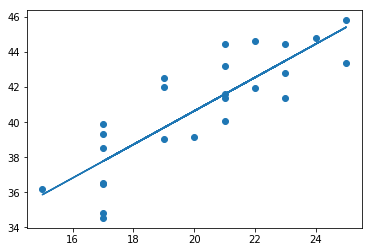

In [55]:
#linear regression graph


x_values = average_cap['Weight (g)']
y_values = average_cap['Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values)
plt.annotate(line_eq,(8,12),fontsize=16)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.title('Linear Regression for Regimens')
plt.show()



equation = str(round(slope,2)) + ", " + str(round(intercept,2))
print(equation)

#Observation: 
#data starts at 21.55 on the y-axis. then it increase 0.95 per unit